In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import MultipleLocator

In [3]:
filename = "./Results/Test Results/results5-30.csv"
results = pd.read_csv(filename)
results.head()

,model_name,accuracy,auc_score,true_0,true_1,false_0,false_1,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,train_time
0,up-128-3_1,0.873517,0.930486,5416,3319,742,523,0.879506,0.863873,0.911938,0.817286,0.895429,0.839934,1423.241743
1,up-128-3_2,0.873517,0.932751,5419,3323,738,520,0.880136,0.864689,0.912443,0.818271,0.895999,0.840840,1369.466477
2,up-128-3_3,0.869165,0.929775,5533,3158,903,406,0.859695,0.886083,0.931638,0.777641,0.894222,0.828328,1366.108235
3,up-128-3_4,0.867484,0.927965,5450,3231,830,489,0.867834,0.868548,0.917663,0.795617,0.892053,0.830485,1420.304309
4,up-128-3_5,0.870154,0.930674,5549,3145,916,390,0.858314,0.889675,0.934332,0.774440,0.894711,0.828067,1451.048118


In [4]:
def min_over_thresh(l,thresh):
    min_val = 9999
    for el in l:
        if el < min_val and el > thresh:
            min_val = el
    return min_val if min_val < 9999 else thresh

def avg_over_thresh(l,thresh):
    total_sum = 0
    over_thresh = 0
    for el in l:
        if el > thresh:
            total_sum+=el
            over_thresh+=1
    return total_sum/over_thresh if over_thresh > 0 else 0


(0.39931325614452357, 0.49630011618137354)

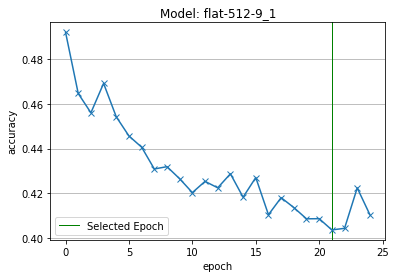

In [5]:
model_name='flat-512-9_1'
filename = './Results/history CSVs/Increase Epochs/'+model_name+'.csv'
history = pd.read_csv(filename)
fig,axes = plt.subplots()
h_length = len(history)-1
model_epoch = history['epoch'][h_length]

max_accuracy = max(history['val_loss'])
min_accuracy = min(history['val_loss'])
yrange = max_accuracy-min_accuracy

axes.axvline(model_epoch, color='green', linewidth=1)
axes.plot(history['val_loss'][:h_length], '-x')
axes.grid(True, axis='y')
axes.set_xlabel('epoch')
axes.set_ylabel('accuracy')
axes.legend(['Selected Epoch'])
axes.set_title('Model: '+model_name)
axes.set_ylim([min_accuracy-0.05*yrange,max_accuracy+0.05*yrange])

In [6]:
def compare_res(metric='accuracy',outlier_thresh=0):
    metric_name = metric.replace('_',' ')
    fig,axes = plt.subplots(5,3,figsize=(13,16))
    fig.tight_layout(pad=4)
    ax = axes.flat
    min_acc = min_over_thresh(results[metric],outlier_thresh)
    max_acc = max(results[metric])
    yrange = max_acc - min_acc
    bottom = min_acc-0.1*yrange
    top = max_acc+0.1*yrange
    grange = top-bottom
    loc = MultipleLocator(base=0.05)

    for i in range(0,15):
        model = results['model_name'][i*12].split('_')[0][:-2]
        avg_metric = [sum(results[metric][i*12:i*12+4])/4, sum(results[metric][i*12+4:i*12+8])/4, sum(results[metric][i*12+8:i*12+12])/4]
        x = [3,3,3,3,6,6,6,6,9,9,9,9]
        col = ['red','red','red','green','green','green','blue','blue','blue',]
        ax[i].scatter(x,results[metric][i*12:i*12+12],label=None)
        ax[i].scatter([3,6,9],avg_metric,c='orange',marker='x',label='Average '+metric_name)
        ax[i].set_xticks([3,6,9])
#         ax[i].yaxis.set_major_locator(loc)
        ax[i].grid(True, which='major', axis='y')
        ax[i].set_xlabel('Number of conv. layers')
        ax[i].set_ylabel(metric_name)
        ax[i].set_title('Model: '+model)
        ax[i].set_ylim([min_acc-0.1*yrange,max_acc+0.1*yrange])
        ax[i].set_xlim([0,12])
        ax[i].legend()

In [7]:
def metric_per_epoch(metric='accuracy',outlier_thresh=0,compare=True):
    metric_name = metric.replace('_',' ')
    fig,axes = plt.subplots(5,3,figsize=(13,16))
    fig.tight_layout(pad=4)
    ax = axes.flat
    max_acc = 0
    min_acc = 99999

    cols = ['#1b9e77','#7570b3','#d95f02']
    #15 graphs
    for i in range(15):
        local_max = 0
        local_min = 9999
        #15 lines per graph
        for j in range(15):
            size = int(j/5)
            model_name = results['model_name'][i*15+j]
            history = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+model_name+'.csv')
            min_acc_h = min_over_thresh(history[metric],outlier_thresh)
            max_acc_h = max(history[metric])
            if min_acc_h < local_min:
                local_min = min_acc_h
                if min_acc_h < min_acc: min_acc=min_acc_h
            if max_acc_h > local_max:
                local_max = max_acc_h
                if max_acc_h > max_acc: max_acc=max_acc_h
            h_length = len(history)-1

            if j%5 == 1: ax[i].plot(history[metric][:h_length],color=cols[size],alpha=0.8,label=str((size+1)*3)+' layers')
            else : ax[i].plot(history[metric][:h_length],color=cols[size],alpha=0.8)
        ax[i].grid(True, axis='y')
        ax[i].set_xlabel('epoch')
        ax[i].set_ylabel(metric_name)
        ax[i].legend()
        ax[i].set_title('Model '+model_name.split('_')[0][:-2]+' '+metric_name+' per epoch')
        if not compare: 
            yrange = local_max - local_min
            ax[i].set_ylim([local_min-0.05*yrange,local_max+0.05*yrange])
    
    if compare:
        yrange = max_acc - min_acc
        for i in range(15):
            ax[i].set_ylim([min_acc-0.05*yrange,max_acc+0.05*yrange])
    
    return fig

In [8]:
def avg_metric_per_epoch(metric='accuracy',outlier_thresh=0,compare=True):
    metric_name = metric.replace('_',' ')
    fig,axes = plt.subplots(5,3,figsize=(13,16))
    fig.tight_layout(pad=4)
    ax = axes.flat
    max_acc = 0
    min_acc = 9999
    h_length = len(pd.read_csv('./Results/history CSVs/Increase Epochs/'+results['model_name'][0]+'.csv')[metric])-1

    cols = ['#1b9e77','#7570b3','#d95f02']
    #15 graphs
    for i in range(15):
        local_max = 0
        local_min = 9999
        model_name=results['model_name'][i*15]
        #3 layer sizes
        for j in range(3):
            avg_hist=[]
            
            hist1 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j*5]+'.csv')
            hist2 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j*5+1]+'.csv')
            hist3 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j*5+2]+'.csv')
            hist4 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j*5+3]+'.csv')
            hist5 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j*5+4]+'.csv')
            
            for hists in zip(hist1[metric],hist2[metric],hist3[metric],hist4[metric],hist5[metric]):
                avg_hist.append(avg_over_thresh(hists,outlier_thresh))
#             for k in range(4):
#                 hist = pd.read_csv('./Results/history CSVs/Increase Epochs/'+results['model_name'][i*12+j+k]+'.csv')
#                 if hist.iloc[-1][metric] > outlier_thresh:
#                     histories.append(hist[metric])
#             num_hists=len(histories)
#             for k in range(h_length):
#                 sum_vals = 0
#                 for hist in histories:
#                     sum_vals += hist[k]
#                 avg_hist.append(sum_vals/num_hists)
                
#             avg_hist = [(h1+h2+h3+h4)/4 for h1,h2 in histories]
            min_acc_h = min_over_thresh(avg_hist,outlier_thresh)
            max_acc_h = max(avg_hist)
            if min_acc_h < local_min:
                local_min = min_acc_h
                if min_acc_h < min_acc: min_acc=min_acc_h
            if max_acc_h > local_max:
                local_max = max_acc_h
                if max_acc_h > max_acc: max_acc=max_acc_h
            

            ax[i].plot(avg_hist[:h_length],color=cols[j],label=str((j+1)*3)+' layers')
        ax[i].grid(True, axis='y')
        ax[i].set_xlabel('epoch')
        ax[i].set_ylabel('Average '+metric_name)
        ax[i].legend()
        ax[i].set_title('Model '+model_name.split('_')[0][:-2]+' avg '+metric_name+' per epoch')
        if not compare: 
            yrange = local_max - local_min
            ax[i].set_ylim([local_min-0.05*yrange,local_max+0.05*yrange])
     
    if compare:
        yrange = max_acc - min_acc
        for i in range(15):
            ax[i].set_ylim([min_acc-0.05*yrange,max_acc+0.05*yrange])
            
    return fig
    

In [32]:
def compact_compare_res(metric='accuracy',outlier_thresh=0,spread=False):
    metric_name = metric.replace('_',' ')
    fig,axes = plt.subplots(1,3,figsize=(13,6))
    fig.tight_layout(pad=4)
    ax = axes.flat
    min_acc = min_over_thresh(results[metric],outlier_thresh)
    max_acc = max(results[metric])
    yrange = max_acc - min_acc
    bottom = min_acc-0.1*yrange
    top = max_acc+0.1*yrange
    grange = top-bottom
    loc = MultipleLocator(base=0.05)

    col = ['#377eb8','#e41a1c','#4daf4a','#984ea3','#ff7f00']
    shape = ['o','s','^','v','D']
    deviation = [-0.2,-0.1,0.0,0.1,0.2]
    
    #3 numbers of feature maps
    for i in range(3):
        local_min = 99999
        local_max = 0
        model = results['model_name'][i*15].split('_')[0][3:-2]
#         avg_metric = [sum(results[metric][i*12:i*12+4])/4, sum(results[metric][i*12+4:i*12+8])/4, sum(results[metric][i*12+8:i*12+12])/4]
        x_base = [3,3,3,3,3,6,6,6,6,6,9,9,9,9,9]
        for j in range(5):
            if spread:
                x = [a+deviation[j] for a in x_base]
            else:
                x = x_base
            will_not_call_this_data = results[metric][i*15+j*45:i*15+j*45+15]
            design = results['model_name'][i*15+j*45].split('-')[0]
            ax[i].scatter(x,will_not_call_this_data,label=design,color=col[j],alpha=0.75,s=35)
#         ax[i].scatter(x,results[metric][i*12:i*12+12],label='up',color='#377eb8',alpha=0.65)
#         ax[i].scatter(x,results[metric][i*12+36:i*12+36+12],label='down',color='#e41a1c',alpha=0.65)
#         ax[i].scatter(x,results[metric][i*12+72:i*12+72+12],label='hill',color='#4daf4a',alpha=0.65)
#         ax[i].scatter(x,results[metric][i*12+108:i*12+108+12],label='valley',color='#984ea3',alpha=0.65)
#         ax[i].scatter(x,results[metric][i*12+144:i*12+144+12],label='flat',color='#ff7f00',alpha=0.65)
#         ax[i].scatter([3,6,9],avg_metric,c='orange',marker='x',label='Average '+metric_name)
        ax[i].set_xticks([3,6,9])
#         ax[i].yaxis.set_major_locator(loc)
        ax[i].grid(True, which='major', axis='y')
        ax[i].set_xlabel('Number of conv. layers')
        ax[i].set_ylabel(metric_name)
        ax[i].set_title(model+' feature maps')
        ax[i].set_ylim([min_acc-0.1*yrange,max_acc+0.1*yrange])
        ax[i].set_xlim([0,12])
        ax[i].legend()
    
    return fig

In [33]:
def compact_compare_res_time(metric='accuracy',outlier_thresh=0):
    metric_name = metric.replace('_',' ')
    fig,axes = plt.subplots(1,3,figsize=(13,6))
    fig.tight_layout(pad=4)
    ax = axes.flat
    min_acc_foreal = min(results[metric])
    aux_results = [(a-min_acc_foreal)/b for a,b in zip(results[metric],results['train_time'])]
    min_acc = min_over_thresh(aux_results,outlier_thresh)
    max_acc = max(aux_results)
    yrange = max_acc - min_acc
    bottom = min_acc-0.1*yrange
    top = max_acc+0.1*yrange
    grange = top-bottom
    loc = MultipleLocator(base=0.05)

    col = ['#377eb8','#e41a1c','#4daf4a','#984ea3','#ff7f00']
    
    for i in range(3):
        local_min = 99999
        local_max = 0
        model = results['model_name'][i*15].split('_')[0][3:-2]
#         avg_metric = [sum(results[metric][i*12:i*12+4])/4, sum(results[metric][i*12+4:i*12+8])/4, sum(results[metric][i*12+8:i*12+12])/4]
        x = [3,3,3,3,3,6,6,6,6,6,9,9,9,9,9]
        for j in range(5):
            thing = [(a-min_acc_foreal)/b for a,b in zip(results[metric][i*15+j*45:i*15+j*45+15],results['train_time'][i*15+j*45:i*15+j*45+15])]
            design = results['model_name'][i*15+j*45].split('-')[0]
            ax[i].scatter(x,thing,label=design,color=col[j],alpha=0.65)
#         ax[i].scatter(x,results[metric][i*12:i*12+12],label='up',color='#377eb8',alpha=0.65)
#         ax[i].scatter(x,results[metric][i*12+36:i*12+36+12],label='down',color='#e41a1c',alpha=0.65)
#         ax[i].scatter(x,results[metric][i*12+72:i*12+72+12],label='hill',color='#4daf4a',alpha=0.65)
#         ax[i].scatter(x,results[metric][i*12+108:i*12+108+12],label='valley',color='#984ea3',alpha=0.65)
#         ax[i].scatter(x,results[metric][i*12+144:i*12+144+12],label='flat',color='#ff7f00',alpha=0.65)
#         ax[i].scatter([3,6,9],avg_metric,c='orange',marker='x',label='Average '+metric_name)
        ax[i].set_xticks([3,6,9])
#         ax[i].yaxis.set_major_locator(loc)
        ax[i].grid(True, which='major', axis='y')
        ax[i].set_xlabel('Number of conv. layers')
        ax[i].set_ylabel(metric_name)
        ax[i].set_title(model+' feature maps')
        ax[i].set_ylim([min_acc-0.1*yrange,max_acc+0.1*yrange])
        ax[i].set_xlim([0,12])
        ax[i].legend()
    
    return fig

In [34]:
def compact_compare_avg_res(metric='accuracy',outlier_thresh=0,compare=True,spread=False):
    metric_name = metric.replace('_',' ')
    fig,axes = plt.subplots(1,3,figsize=(13,6))
    fig.tight_layout(pad=4)
    ax = axes.flat
    min_acc = 99999
    max_acc = 0

    col = ['#377eb8','#e41a1c','#4daf4a','#984ea3','#ff7f00']
    dev = [-0.2,-0.1,0.0,0.1,0.2]
    
    for i in range(3):
        local_min = 99999
        local_max = 0
        model = results['model_name'][i*15].split('_')[0][3:-2]
#         avg_metric = [sum(results[metric][i*12:i*12+4])/4, sum(results[metric][i*12+4:i*12+8])/4, sum(results[metric][i*12+8:i*12+12])/4]
        x_base = [3,3,3,3,3,6,6,6,6,6,9,9,9,9,9]
        
        for j in range(0,181,45):
            index = int(j/45)
            avg_metric = [avg_over_thresh(results[metric][i*15+j:i*15+j+5],outlier_thresh), avg_over_thresh(results[metric][i*15+j+5:i*15+j+10],outlier_thresh), avg_over_thresh(results[metric][i*15+j+10:i*15+j+15],outlier_thresh)]
            max_avg = max(avg_metric)
            min_avg = min_over_thresh(avg_metric,outlier_thresh)
            if max_avg > local_max:
                local_max = max_avg
                if max_avg > max_acc: max_acc = max_avg
            if min_avg < local_min:
                local_min = min_avg
                if min_avg < min_acc: min_acc = min_avg
            if spread:
                d = dev[index]
                ax[i].scatter([3+d,6+d,9+d],avg_metric,label=results['model_name'][j].split('-')[0],color=col[index],alpha=0.7)
            else:
                ax[i].scatter([3,6,9],avg_metric,label=results['model_name'][j].split('-')[0],color=col[index],alpha=0.7)
        ax[i].set_xticks([3,6,9])
        ax[i].grid(True, which='major', axis='y')
        ax[i].set_xlabel('Number of conv. layers')
        ax[i].set_ylabel('Average '+metric_name)
        ax[i].set_title(model+' feature maps')
        ax[i].set_xlim([0,12])
        ax[i].legend()
        if not compare:
            yrange = local_max - local_min
            ax[i].set_ylim([local_min-0.1*yrange,local_max+0.1*yrange])
       
    if compare:
        yrange = max_acc - min_acc
        for i in range(3):
            ax[i].set_ylim([min_acc-0.1*yrange,max_acc+0.1*yrange])
    
    return fig

In [35]:
def compact_avg_metric_per_epoch(metric='accuracy',outlier_thresh=0):
    metric_name = metric.replace('_',' ')
    fig,axes = plt.subplots(3,3,figsize=(13,12))
    fig.tight_layout(pad=4)
#     ax = axes.flat
    min_acc = 99999
    max_acc = 0
    
    cols = ['#377eb8','#e41a1c','#4daf4a','#984ea3','#ff7f00']
    
    #for each size (128,258,512)
    for i in range(3):
        features = results['model_name'][i*15].split('_')[0][3:-2]
        #for each shape (up,down...)
        for j in range(0,181,45):
            shape_group = int(j/45)
            #for each number of layers (3,6,9)
            for k in range(3):
                avg_hist=[]
        
                hist1 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j+k*5]+'.csv')
                hist2 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j+k*5+1]+'.csv')
                hist3 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j+k*5+2]+'.csv')
                hist4 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j+k*5+3]+'.csv')
                hist5 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j+k*5+4]+'.csv')
                h_length=len(hist1)-1
                
                for hists in zip(hist1[metric],hist2[metric],hist3[metric],hist4[metric],hist5[metric]):
                    avg_hist.append(avg_over_thresh(hists,outlier_thresh))
                
                min_h = min(avg_hist)
                max_h = max(avg_hist)
                if min_h < min_acc: min_acc = min_h
                if max_h > max_acc: max_acc = max_h
                
                axes[i][k].plot(avg_hist[:h_length],color=cols[shape_group],alpha=0.7,label=results['model_name'][j].split('-')[0])
        
                axes[i][k].grid(True, which='major', axis='y')
                axes[i][k].set_title(str((k+1)*3)+' layers, '+features+' feature maps')
                axes[i][k].set_ylabel('Average '+metric_name)
                axes[i][k].set_xlabel('Epoch')
                axes[i][k].legend()
                
    yrange = max_h-min_h
    for i in range(3):
        for j in range(3):
            axes[i][j].set_ylim([min_acc-0.1*yrange,max_acc+0.1*yrange])
    
    return fig

In [30]:
def compact_avg_metric_per_time(metric='accuracy',outlier_thresh=0):
    metric_name = metric.replace('_',' ')
    fig,axes = plt.subplots(3,3,figsize=(13,12))
    fig.tight_layout(pad=4)
#     ax = axes.flat
    min_acc = 99999
    max_acc = 0
    max_time = 0
    
    cols = ['#377eb8','#e41a1c','#4daf4a','#984ea3','#ff7f00']
    
    #for each size (128,258,512)
    for i in range(3):
        features = results['model_name'][i*15].split('_')[0][3:-2]
        #for each shape (up,down...)
        for j in range(0,181,45):
            shape_group = int(j/45)
            #for each number of layers (3,6,9)
            for k in range(3):
                avg_hist=[]
        
                hist1 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j+k*5]+'.csv')
                hist2 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j+k*5+1]+'.csv')
                hist3 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j+k*5+2]+'.csv')
                hist4 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j+k*5+3]+'.csv')
                hist5 = pd.read_csv('./Results/history CSVs/Increase Epochs 30/'+results['model_name'][i*15+j+k*5+4]+'.csv')
                h_length=len(hist1)-1
                
                previous_max_acc = 0
                for hists in zip(hist1[metric],hist2[metric],hist3[metric],hist4[metric],hist5[metric]):
                    avg = avg_over_thresh(hists,outlier_thresh)
                    if avg > previous_max_acc:
                        previous_max_acc = avg
                        avg_hist.append(avg)
                    else: avg_hist.append(previous_max_acc)
                
                min_h = min(avg_hist)
                max_h = max(avg_hist)
                if min_h < min_acc: min_acc = min_h
                if max_h > max_acc: max_acc = max_h
                
                avg_time = (hist1['model_train_time'][h_length] + hist2['model_train_time'][h_length] + hist3['model_train_time'][h_length] + hist4['model_train_time'][h_length] + hist5['model_train_time'][h_length])/5
                if avg_time > max_time: max_time = avg_time
                time_epoch = avg_time/h_length
                times = [t*time_epoch for t in range(1,h_length+1)]
                axes[i][k].plot(times, avg_hist[:h_length],color=cols[shape_group],alpha=0.7,label=results['model_name'][j].split('-')[0])
        
                axes[i][k].grid(True, which='major', axis='y')
                axes[i][k].set_title(str((k+1)*3)+' layers, '+features+' feature maps')
                axes[i][k].set_ylabel('Average '+metric_name)
                axes[i][k].set_xlabel('Seconds')
                axes[i][k].legend()
                
    yrange = max_h-min_h
    for i in range(3):
        for j in range(3):
            axes[i][j].set_ylim([min_acc-0.1*yrange,max_acc+0.1*yrange])
            axes[i][j].set_xlim([0,max_time])
    
    return fig

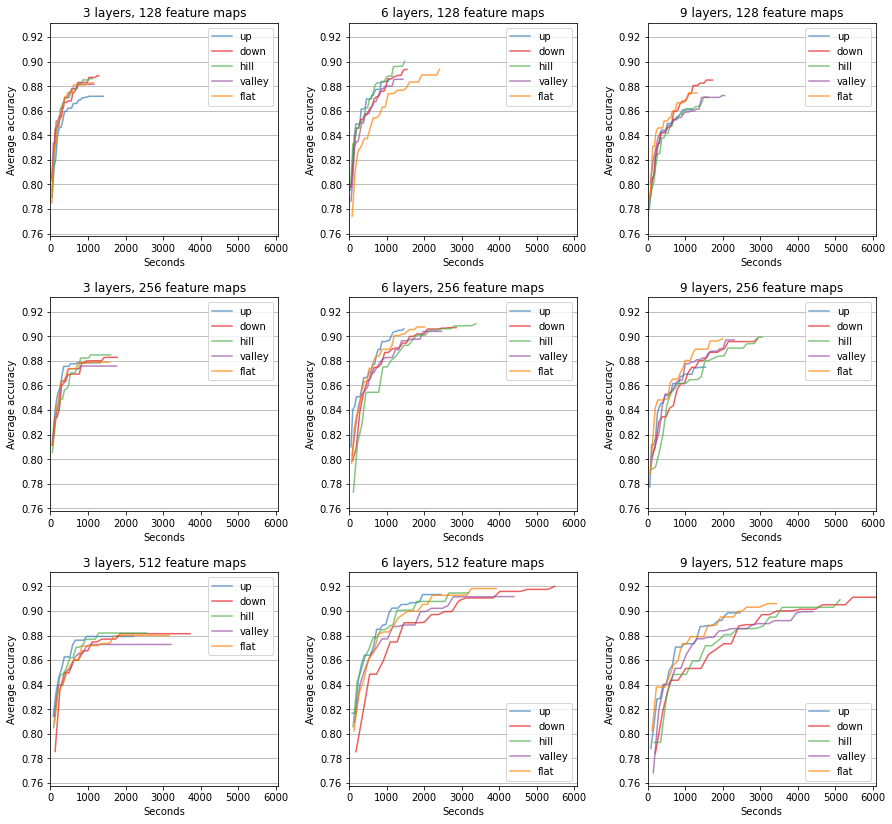

In [20]:
graph_name = '5-30_accuracy_avg_per_time_compact_compare_06'
compact_avg_metric_per_time('accuracy',outlier_thresh=0.6).savefig('./Graphs/'+graph_name+'.png');

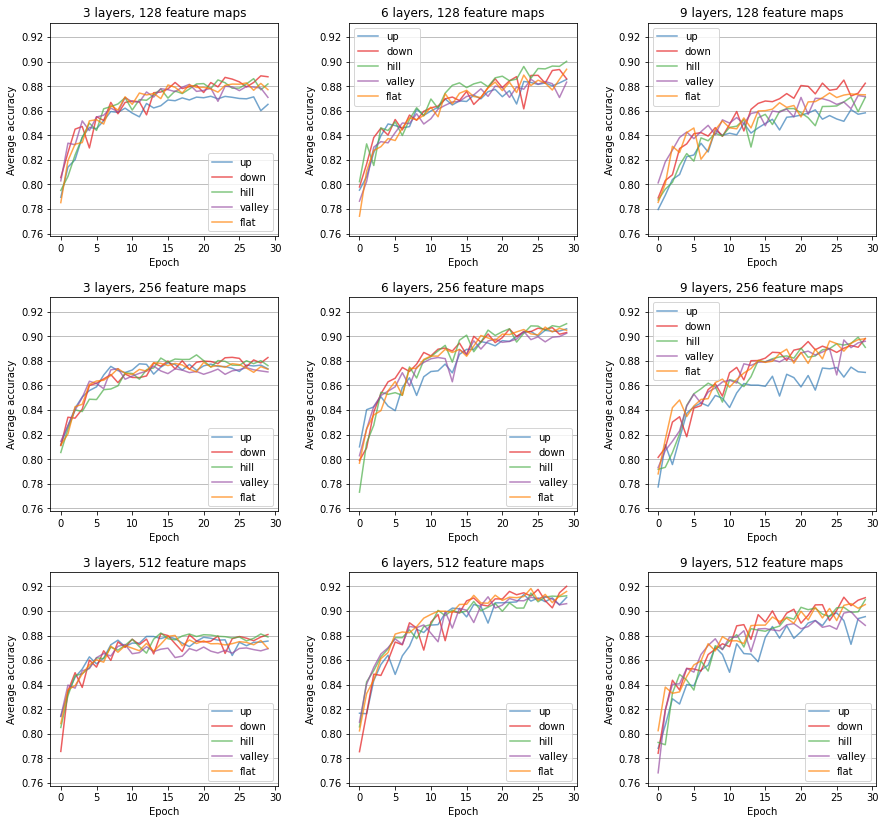

In [19]:
graph_name = '5-30_accuracy_avg_per_epoch_compact_compare_06'
compact_avg_metric_per_epoch('accuracy',outlier_thresh=0.6).savefig('./Graphs/'+graph_name+'.png');

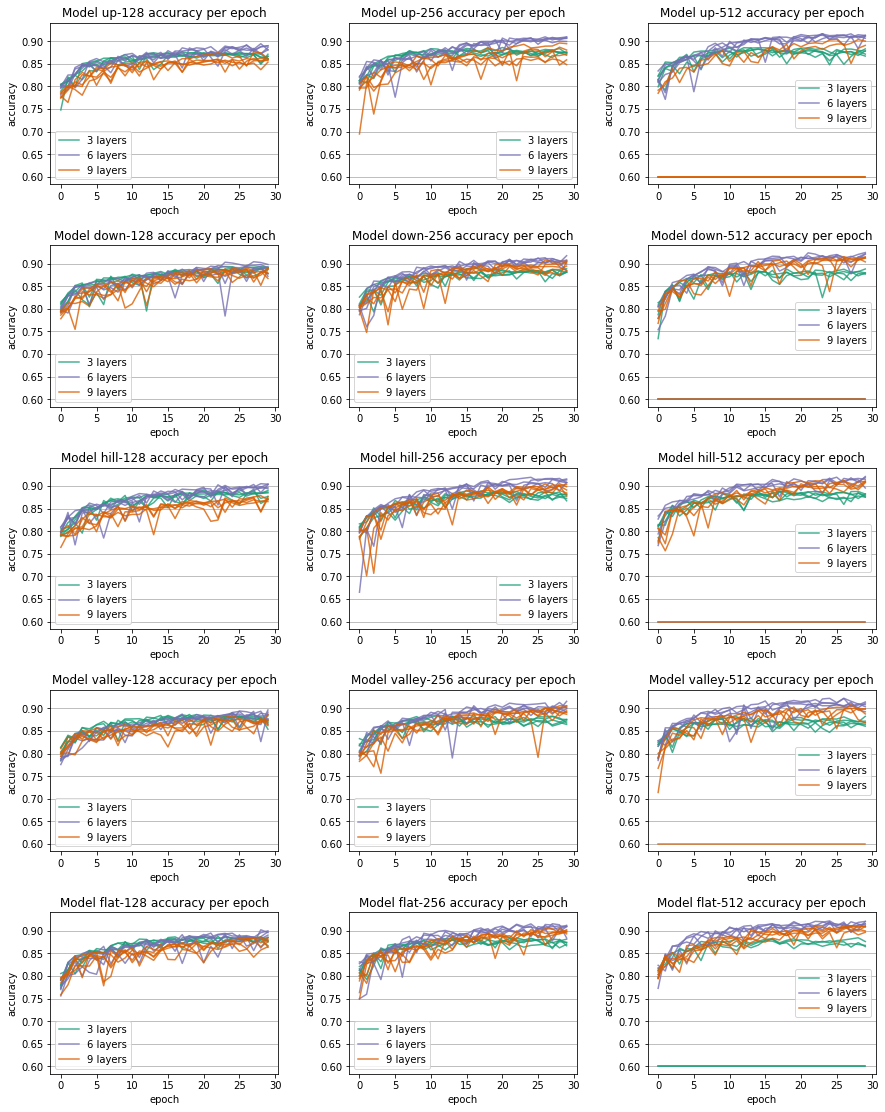

In [225]:
graph_name = 'accuracy_per_epoch_compare_0'
metric_per_epoch(metric='accuracy',outlier_thresh=0,compare=True);#.savefig('./Graphs/'+graph_name+'.png')

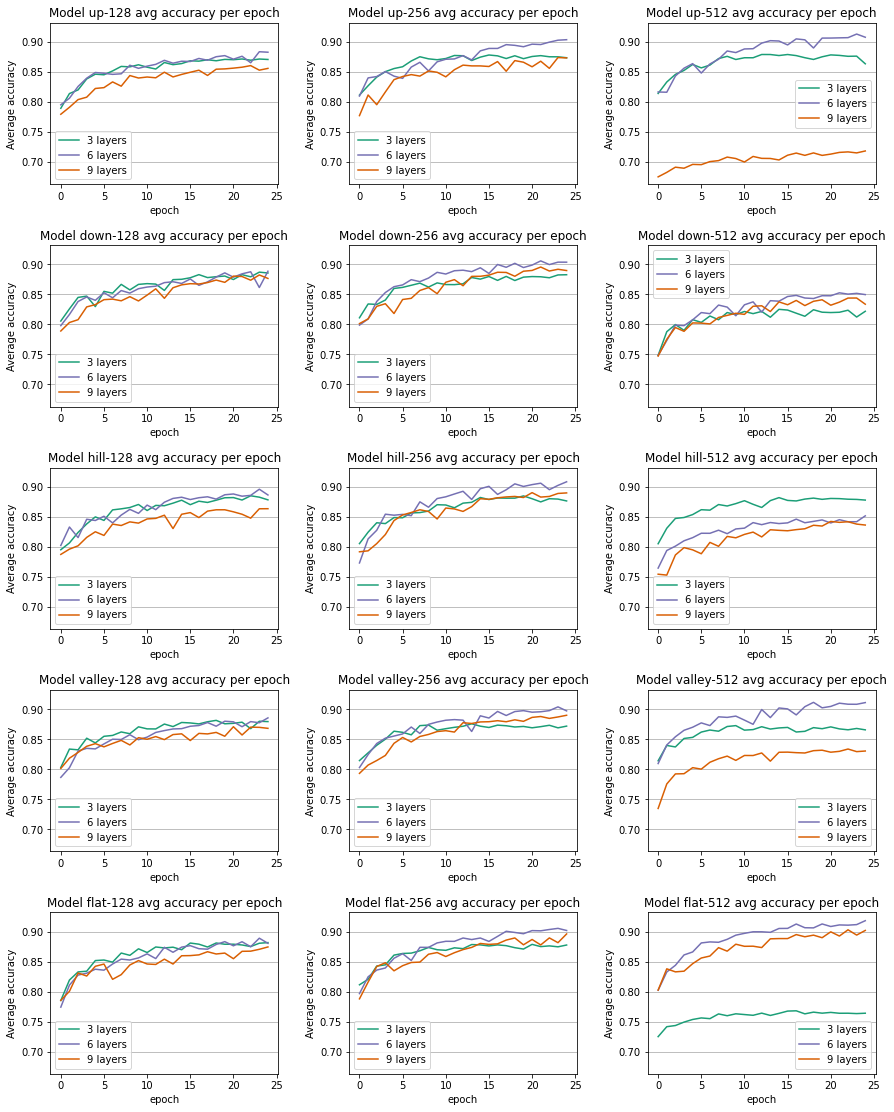

In [152]:
avg_metric_per_epoch(metric='accuracy',outlier_thresh=0,compare=True);

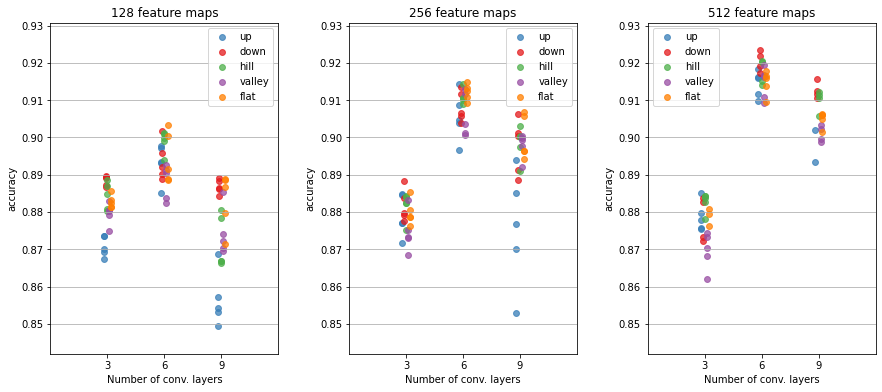

In [40]:
graph_name = '5-30_accuracy_compact_compare_06_spread'
compact_compare_res('accuracy',0.6,spread=True).savefig('./Graphs/'+graph_name+'.png')

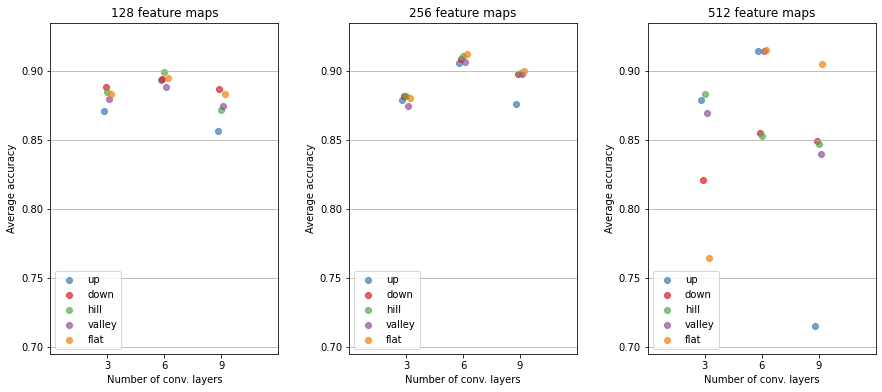

In [15]:
graph_name = '5-30_accuracy_avg_compact_compare_0_spread'
compact_compare_avg_res('accuracy',outlier_thresh=0,compare=True,spread=True).savefig('./Graphs/'+graph_name+'.png')

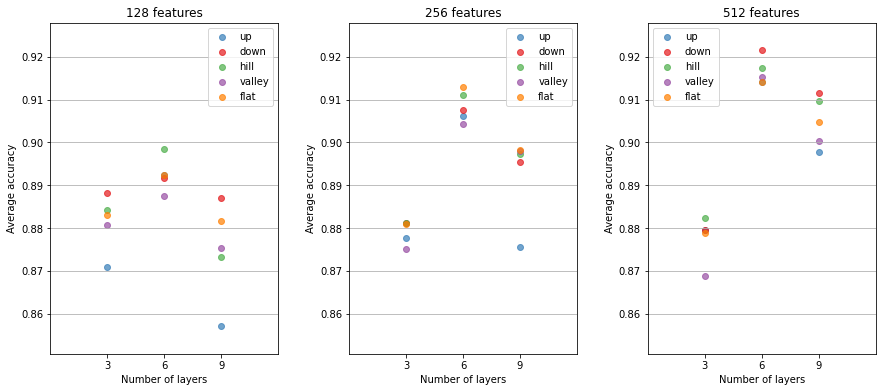

In [71]:
compact_compare_avg_res('accuracy',outlier_thresh=0.6,compare=True);

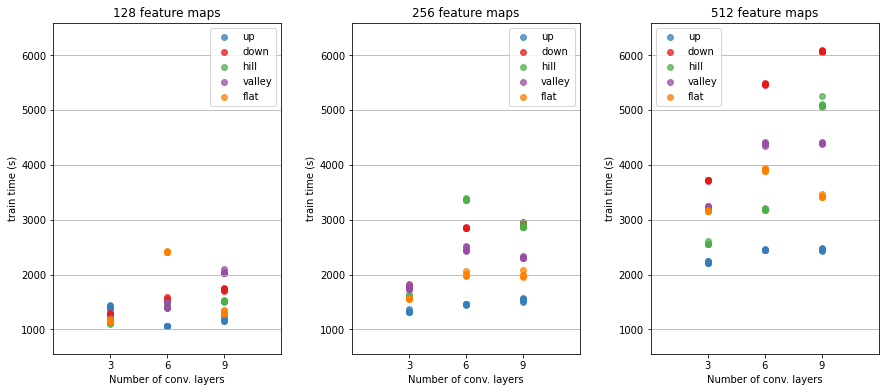

In [27]:
graph_name = '5-30_time_compact_compare'
compact_compare_res('train_time',0).savefig('./Graphs/'+graph_name+'.png');

In [ ]:
compare_res('accuracy',0.6)

In [ ]:
compare_res('auc_score',0.65)

In [ ]:
compare_res('train_time',0)

In [204]:
model_acc = {}
model_auc = {}

current_model = ''
accuracies = []
aucs = []

for index,row in results.iterrows():
    accuracies.append(row['accuracy'])
    aucs.append(row['auc_score'])
    if index % 5 == 4:
        model_acc[current_model] = accuracies
        accuracies = []
        model_auc[current_model] = aucs
        aucs=[]
    elif index % 5 == 0:
        current_model = row['model_name'][:-2]
# print(model_acc)

# with open('./Results/Test Results/Statistical Table.txt','a') as file:
#     file.write('name,avg_acc,acc_std,acc_90p,avg_auc,auc_std,auc_90p\n')

for name, accs in model_acc.items():
    group,size,layers = name.split('-')
    aux_name = group[0].upper()+'-'+size+'-'+layers
    naccs = np.array(accs)
    naucs = np.array(model_auc[name])
    p90 = np.percentile(naccs,90)
    std = np.std(naccs)
    avg = sum(accs)/5
    p90_auc = np.percentile(naucs,90)
    std_auc = np.std(naucs)
    avg_auc = sum(model_auc[name])/5
    with open('./Results/Test Results/Statistical Table2.txt','a') as file:
        file.write('{},{},{},{},{},{},{}\n'.format(aux_name,avg,std,p90,avg_auc,std_auc,p90_auc))
    print('{}: {}\n\tAverage acc: {}\n\t90 percentile: {}\n\tStandard Deviation: {}\n\tAverage AUC: {}\n\t90 percentile: {}\n\tStandard Deviation: {}'
          .format(aux_name,accs,avg,p90,std,avg_auc,p90_auc,std_auc))

U-128-3: [0.873516619, 0.873516619, 0.869165361, 0.867484152, 0.870154262]
	Average acc: 0.8707674026
	90 percentile: 0.873516619
	Standard Deviation: 0.0024016075788503635
	Average AUC: 0.930330369
	90 percentile: 0.9319202586
	Standard Deviation: 0.0015430773800988724
U-128-6: [0.885087013, 0.897646368, 0.893295109, 0.893196225, 0.897151887]
	Average acc: 0.8932753203999999
	90 percentile: 0.8974485756
	Standard Deviation: 0.004498640938629948
	Average AUC: 0.9453439818
	90 percentile: 0.9481191672
	Standard Deviation: 0.0032381738916670093
U-128-9: [0.857199371, 0.849386871, 0.853144765, 0.868670881, 0.854232609]
	Average acc: 0.8565268994
	90 percentile: 0.864082277
	Standard Deviation: 0.006566751316228557
	Average AUC: 0.9206033524
	90 percentile: 0.9269247406
	Standard Deviation: 0.005801179785988268
U-256-3: [0.876977861, 0.877175629, 0.884592593, 0.871637642, 0.884790361]
	Average acc: 0.8790348172
	90 percentile: 0.8847112538
	Standard Deviation: 0.005028339821213684
	Average